## Logistic Regression - 2
## Titanic dataset - binary classification - died/survived

Handling missing values and preprocessing 
Building from scratch 

In [2]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;
from sklearn.model_selection import train_test_split;
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc;
from sklearn.linear_model import LogisticRegression;

In [3]:
#Load the dataset
df = sns.load_dataset("titanic");
print(df.head());
print(df.info());

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

### EDA - Exploratory Data Analysis 

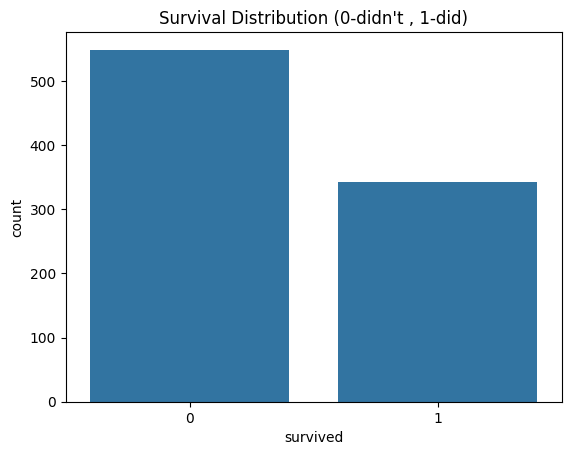

In [4]:
#Survival Distribution
sns.countplot(x='survived', data=df);
plt.title("Survival Distribution (0-didn't , 1-did)");
plt.show();

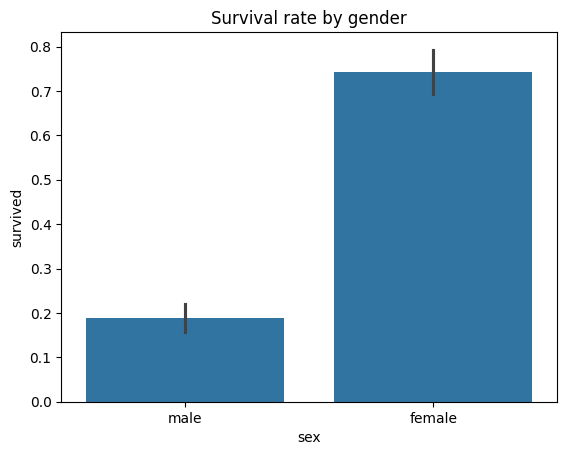

In [5]:
#Survival by gender
sns.barplot(x='sex', y='survived', data=df);
plt.title("Survival rate by gender");
plt.show();

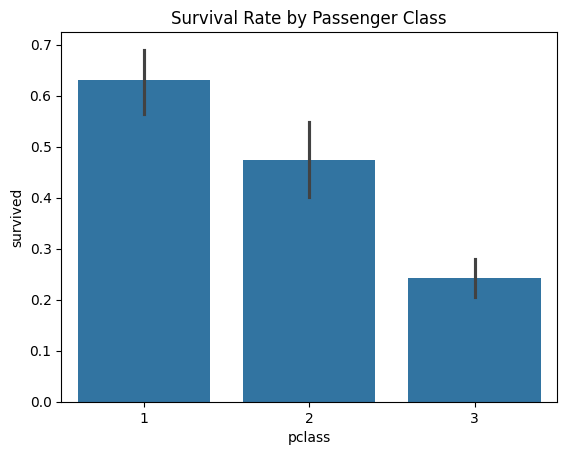

In [6]:
# Survival by Passenger Class
sns.barplot(x='pclass', y='survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

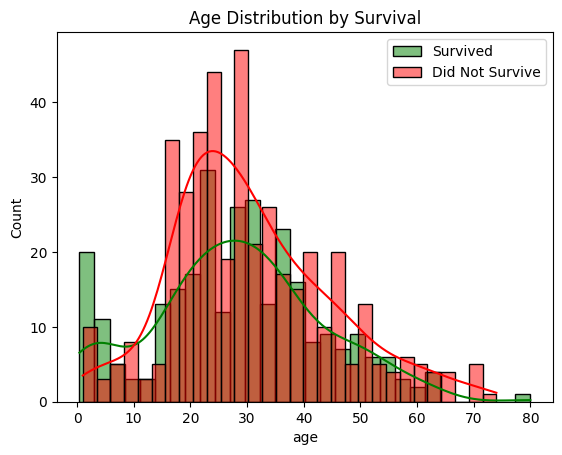

In [7]:
# Age distribution by survival
sns.histplot(df[df['survived']==1]['age'], bins=30, color='green', label='Survived', kde=True)
sns.histplot(df[df['survived']==0]['age'], bins=30, color='red', label='Did Not Survive', kde=True)
plt.legend()
plt.title("Age Distribution by Survival")
plt.show()

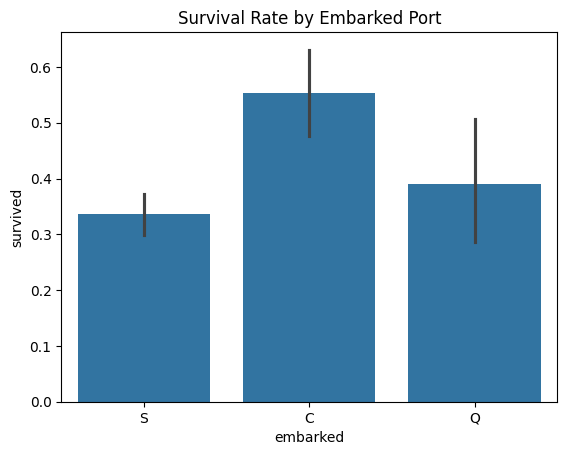

In [8]:
# Survival by Embarked
sns.barplot(x='embarked', y='survived', data=df)
plt.title("Survival Rate by Embarked Port")
plt.show()

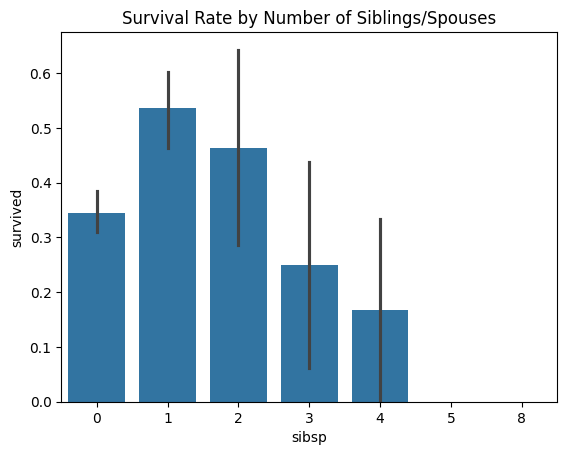

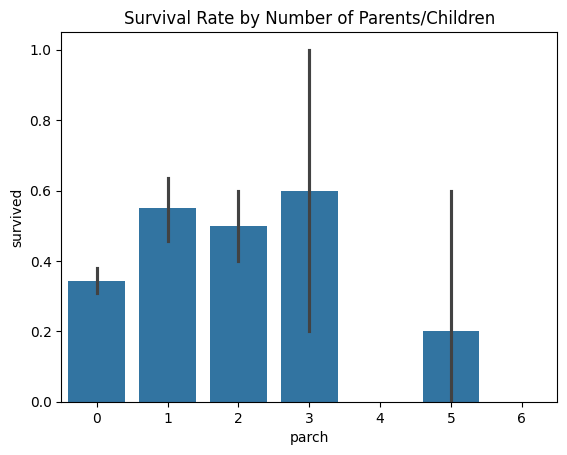

In [9]:
# Family features (SibSp & Parch)
sns.barplot(x='sibsp', y='survived', data=df)
plt.title("Survival Rate by Number of Siblings/Spouses")
plt.show()

sns.barplot(x='parch', y='survived', data=df)
plt.title("Survival Rate by Number of Parents/Children")
plt.show()

The black vertical line depicts the confidence interval .
A confidence interval gives a range where the true population mean is likely to fall.

By default, seaborn shows a 95% CI.
Example:

If Survival rate for females = 0.75 ± 0.05,
the bar will be at 0.75 and the line will extend up/down by 0.05

### Pre-processing

In [10]:
features = ["pclass", "sex", "age", "sibsp", "parch", "fare", "embarked"];
target = "survived";

data = df[features+[target]].copy();

In [11]:
age_median = data["age"].median();

print(data["age"]);

data["age"].fillna(age_median, inplace=True);
print(data["age"]);


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64
0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64


C:\Users\Harkirat Singh\AppData\Local\Temp\ipykernel_17844\2294852414.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["age"].fillna(age_median, inplace=True);


In [12]:
embarked_mode = data["embarked"].mode()[0];

print(data["embarked"]);

data["embarked"].fillna(embarked_mode, inplace=True);
print(data["embarked"]);


0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object
0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object


C:\Users\Harkirat Singh\AppData\Local\Temp\ipykernel_17844\3697136005.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["embarked"].fillna(embarked_mode, inplace=True);


In [13]:
data.dropna(subset=["fare"], inplace=True)

In [14]:
#Encoding Categorical Features
'''
pd.get_dummies create new binary column for each category
drop_first = True, to drop 1 column as if we know 2 cols third
one can be derived.
'''
data["sex"] = data["sex"].map({"male":0, "female":1});
data = pd.get_dummies(data, columns=["embarked"], drop_first=True);
print(data);

     pclass  sex   age  sibsp  parch     fare  survived  embarked_Q  \
0         3    0  22.0      1      0   7.2500         0       False   
1         1    1  38.0      1      0  71.2833         1       False   
2         3    1  26.0      0      0   7.9250         1       False   
3         1    1  35.0      1      0  53.1000         1       False   
4         3    0  35.0      0      0   8.0500         0       False   
..      ...  ...   ...    ...    ...      ...       ...         ...   
886       2    0  27.0      0      0  13.0000         0       False   
887       1    1  19.0      0      0  30.0000         1       False   
888       3    1  28.0      1      2  23.4500         0       False   
889       1    0  26.0      0      0  30.0000         1       False   
890       3    0  32.0      0      0   7.7500         0        True   

     embarked_S  
0          True  
1         False  
2          True  
3          True  
4          True  
..          ...  
886        True  
887

In [15]:
x = data.drop(columns=[target]).values
y = data[target].values

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
# Ensure x_train and x_test are NumPy arrays with float dtype
x_train = np.array(x_train, dtype=float)
x_test = np.array(x_test, dtype=float)

In [18]:
# Standardization
print(x_train.shape);
mean_train = x_train.mean(axis=0)
std_train = x_train.std(axis=0)
x_train_s = (x_train - mean_train) / std_train
x_test_s  = (x_test  - mean_train) / std_train


(712, 8)


In [19]:
# Add bias column
def add_bias(x):
    return np.c_[np.ones((x.shape[0], 1)), x]

x_train_b = add_bias(x_train_s)
x_test_b  = add_bias(x_test_s)


In [20]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(x_b, y, theta):
    n = len(y)
    prediction = sigmoid(x_b.dot(theta))
    cost = -(1/n) * np.sum(y*np.log(prediction+1e-15) + (1-y)*np.log(1-prediction+1e-15))
    return cost

def gradient_descent(x_b, y, theta_init, lr=0.1, epochs=3000):
    theta = theta_init.copy()
    cost_history = []
    for i in range(epochs):
        prediction = sigmoid(x_b.dot(theta))
        error = prediction - y
        gradients = (1/len(y)) * x_b.T.dot(error)
        theta -= lr * gradients
        cost_history.append(compute_cost(x_b, y, theta))
    return theta, cost_history


In [21]:
theta0 = np.zeros(x_train_b.shape[1])
theta, cost_hist = gradient_descent(x_train_b, y_train, theta0, lr=0.1, epochs=5000)

print("Learned theta (first 5):", theta[:5])
print("Final training cost:", cost_hist[-1])


Learned theta (first 5): [-0.6792156  -0.80167436  1.29435108 -0.40665328 -0.35802471]
Final training cost: 0.4481803075069414


Test Accuracy: 0.8100558659217877
Confusion Matrix:
 [[90 15]
 [19 55]]


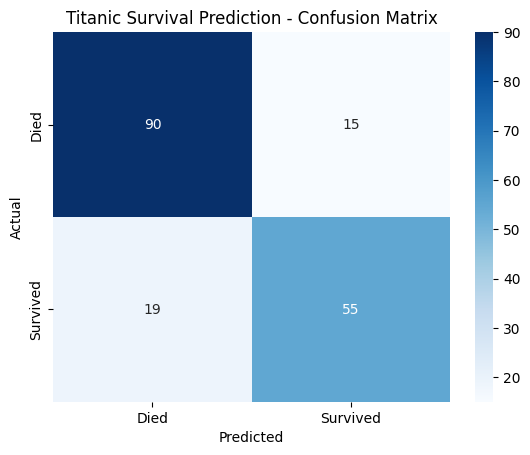

In [22]:
y_pred_prob = sigmoid(x_test_b.dot(theta))
y_pred = (y_pred_prob >= 0.5).astype(int)

print("Test Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Died","Survived"], yticklabels=["Died","Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Titanic Survival Prediction - Confusion Matrix")
plt.show()


In [23]:
clf = LogisticRegression(max_iter=5000)
clf.fit(x_train_s, y_train)

print("Sklearn Test Accuracy:", clf.score(x_test_s, y_test))


Sklearn Test Accuracy: 0.8100558659217877


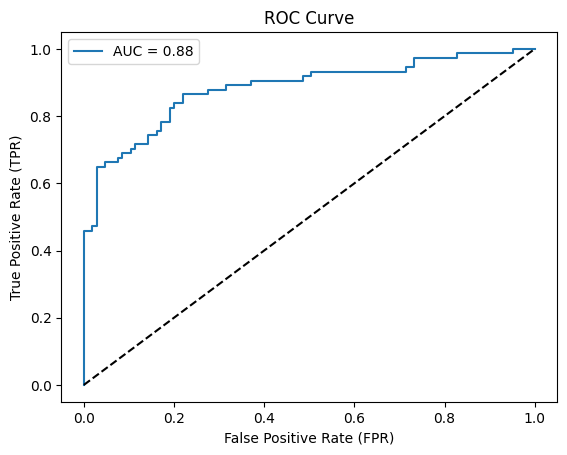

In [24]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# y_test = true labels, y_pred_prob = predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], "k--")  # diagonal line (random guess)
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.show()


## Logistic Regression - 2 completed successfully